In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
#importing necessary libraries

# Ques4(a)

In [6]:
df=pd.read_excel("Online Retail.xlsx")
df.head()
#loading data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
df['Description'].value_counts()
#checking number of unique descriptions available

WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 
Missing                                   1
historic computer difference?....se       1
DUSTY PINK CHRISTMAS TREE 30CM            1
WRAP BLUE RUSSIAN FOLKART                 1
PINK BERTIE MOBILE PHONE CHARM            1
Name: Description, Length: 4223, dtype: int64

In [8]:
len(df['CustomerID'].unique())
#number of unique customers

4373

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [10]:
df.isnull().sum()
#there are some null values

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [11]:
df.shape

(541909, 8)

In [12]:
df=df.dropna()
df.shape
#removing rows with null values

(406829, 8)

In [13]:
df.isnull().sum()
#no null values now

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [14]:
df['Quantity'].unique()
#negative quantities exists

array([     6,      8,      2,     32,      3,      4,     24,     12,
           48,     18,     20,     36,     80,     64,     10,    120,
           96,     23,      5,      1,     -1,     50,     40,    100,
          192,    432,    144,    288,    -12,    -24,     16,      9,
          128,     25,     30,     28,      7,     72,    200,    600,
          480,     -6,     14,     -2,     -4,     -5,     -7,     -3,
           11,     70,    252,     60,    216,    384,     27,    108,
           52,  -9360,     75,    270,     42,    240,     90,    320,
           17,   1824,    204,     69,    -36,   -192,   -144,    160,
         2880,   1400,     19,     39,    -48,    -50,     56,     13,
         1440,     -8,     15,    720,    -20,    156,    324,     41,
          -10,    -72,    -11,    402,    378,    150,    300,     22,
           34,    408,    972,    208,   1008,     26,   1000,    -25,
         1488,    250,   1394,    400,    110,    -14,     37,    -33,
      

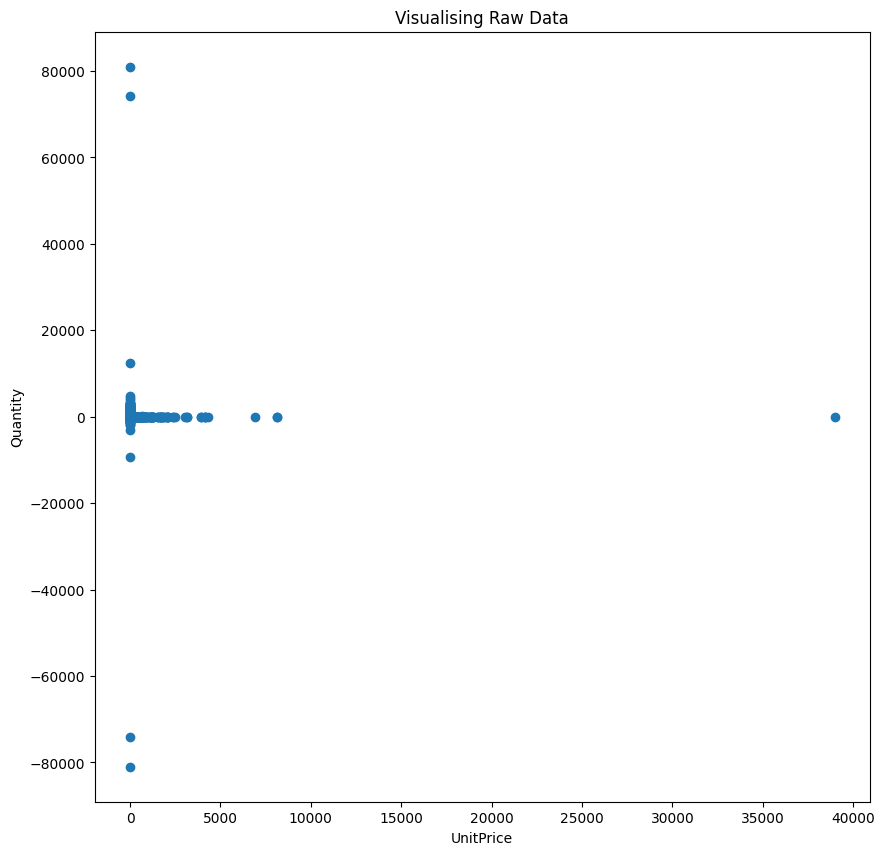

In [15]:
plt.figure(figsize=(10,10))
plt.scatter(df['UnitPrice'],df['Quantity'])
plt.xlabel("UnitPrice")
plt.ylabel("Quantity")
plt.title("Visualising Raw Data")
plt.show()
#observing there are some negative quantities in data and we cannot
#purchase negative quantities so removing them

In [16]:
df = df[(df['Quantity']>0)]
#removing rows with negative qunatities

In [17]:
df['Quantity'].unique()
#no null values

array([    6,     8,     2,    32,     3,     4,    24,    12,    48,
          18,    20,    36,    80,    64,    10,   120,    96,    23,
           5,     1,    50,    40,   100,   192,   432,   144,   288,
          16,     9,   128,    25,    30,    28,     7,    72,   200,
         600,   480,    14,    11,    70,   252,    60,   216,   384,
          27,   108,    52,    75,   270,    42,   240,    90,   320,
          17,  1824,   204,    69,   160,  2880,  1400,    19,    39,
          56,    13,  1440,    15,   720,   156,   324,    41,   402,
         378,   150,   300,    22,    34,   408,   972,   208,  1008,
          26,  1000,  1488,   250,  1394,   400,   110,    37,    78,
          21,   272,    84,    47,  1728,    38,    53,    76,   576,
          29,  2400,   500,   180,   960,  1296,   147,   168,   256,
          54,    31,   860,  1010,  1356,  1284,   186,   114,   360,
        1930,  2000,  3114,  1300,   670,   176,   648,    62, 74215,
          89,    33,

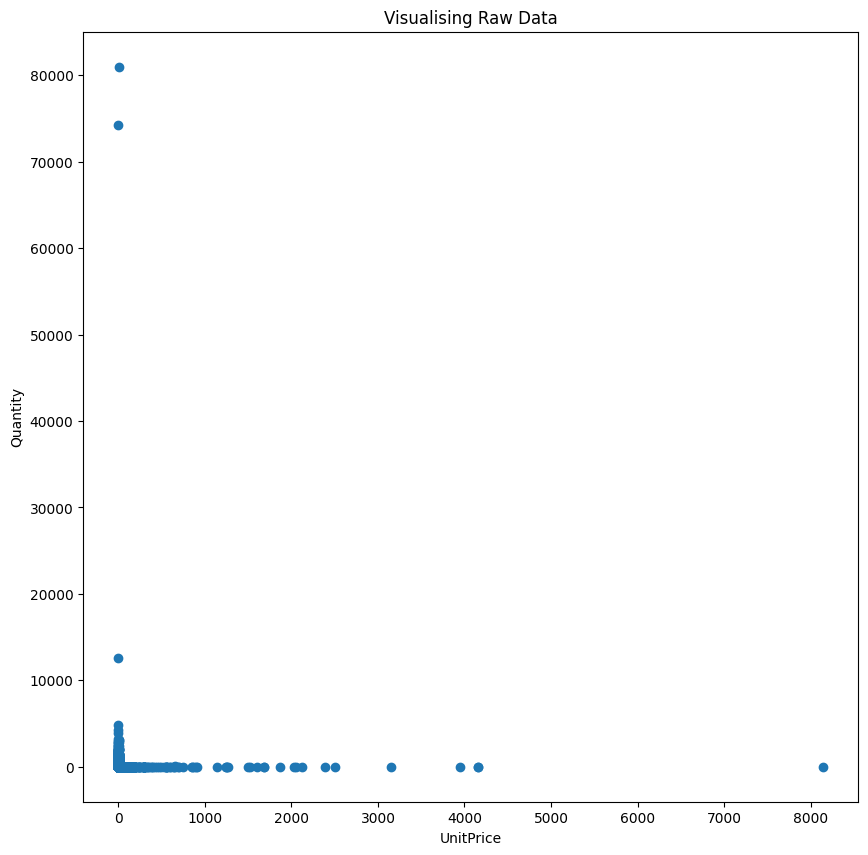

In [18]:
plt.figure(figsize=(10,10))
plt.scatter(df['UnitPrice'],df['Quantity'])
plt.xlabel("UnitPrice")
plt.ylabel("Quantity")
plt.title("Visualising Raw Data")
plt.show()
#plotting again to see that no null values exists

In [19]:
df['Amount'] = df['Quantity']*df['UnitPrice']
df.head()
#creating a column amount

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [20]:
df2_a = df.groupby('CustomerID')['Amount'].sum()
df2_a = df2_a.reset_index()
df2_a.columns=['CustomerID','Amount']
print(df2_a.head())
df2_f = df.groupby('CustomerID')['InvoiceNo'].count()
df2_f = df2_f.reset_index()
df2_f.columns=['CustomerID','Frequency']
print(df2_f.head())
#calculating total amount spend by customer and frequency of purchase

   CustomerID    Amount
0     12346.0  77183.60
1     12347.0   4310.00
2     12348.0   1797.24
3     12349.0   1757.55
4     12350.0    334.40
   CustomerID  Frequency
0     12346.0          1
1     12347.0        182
2     12348.0         31
3     12349.0         73
4     12350.0         17


In [21]:
df2 = pd.merge(df2_a, df2_f, on='CustomerID', how='inner')
df2.head()
#merging amount and frequency data together

,CustomerID,Amount,Frequency
0,12346.0,77183.60,1
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [22]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],format='%d-%m-%Y %H:%M')
#changing format of invoice date

In [23]:
max_date = max(df['InvoiceDate'])
max_date
#finding the last purchase date

Timestamp('2011-12-09 12:50:00')

In [24]:
df['Difference'] = max_date - df['InvoiceDate']
df.head()
#how recently the item was puchased

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Difference
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [25]:
df2_p = df.groupby('CustomerID')['Difference'].min()
df2_p = df2_p.reset_index()
df2_p.head()
#creating table of how recently customer made a purchase

,CustomerID,Difference
0,12346.0,325 days 02:49:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [26]:
df2_p['Difference'] = df2_p['Difference'].dt.days
df2_p.head()
#we just need number of days

,CustomerID,Difference
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [27]:
df2 = pd.merge(df2, df2_p, on='CustomerID', how='inner')
#merging this data to our original data

In [28]:
df2.head()

,CustomerID,Amount,Frequency,Difference
0,12346.0,77183.60,1,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [29]:
len(df['CustomerID'].unique())

4339

In [30]:
df2_n = df.groupby('CustomerID')['Quantity'].sum()
df2_n = df2_n.reset_index()
df2_n.columns=['CustomerID','TotalQuantity']
df2_n.head()
#finding total quantity purchased by a customer

,CustomerID,TotalQuantity
0,12346.0,74215
1,12347.0,2458
2,12348.0,2341
3,12349.0,631
4,12350.0,197


In [31]:
df2 = pd.merge(df2, df2_n, on='CustomerID', how='inner')
df2.head()
#merging the total quantity to our new dataframe

,CustomerID,Amount,Frequency,Difference,TotalQuantity
0,12346.0,77183.60,1,325,74215
1,12347.0,4310.00,182,1,2458
2,12348.0,1797.24,31,74,2341
3,12349.0,1757.55,73,18,631
4,12350.0,334.40,17,309,197


In [32]:
df2_noip = df.groupby('CustomerID')['Quantity'].count()
df2_noip = df2_noip.reset_index()
df2_noip.columns=['CustomerID','NotOfItemsPurchase']
df2_noip.head()
#finding total quantity purchased by a customer

,CustomerID,NotOfItemsPurchase
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [33]:
df2 = pd.merge(df2, df2_noip, on='CustomerID', how='inner')
df2.head()
#merging the total quantity to our new dataframe

,CustomerID,Amount,Frequency,Difference,TotalQuantity,NotOfItemsPurchase
0,12346.0,77183.60,1,325,74215,1
1,12347.0,4310.00,182,1,2458,182
2,12348.0,1797.24,31,74,2341,31
3,12349.0,1757.55,73,18,631,73
4,12350.0,334.40,17,309,197,17


In [34]:
df2_max = df.groupby('CustomerID')['Quantity'].max()
df2_max = df2_max.reset_index()
df2_max.columns=['CustomerID','Max']
df2_max.head()
# Max quantity purchased at a time by a customer

,CustomerID,Max
0,12346.0,74215
1,12347.0,240
2,12348.0,144
3,12349.0,36
4,12350.0,24


In [35]:
df2 = pd.merge(df2, df2_max, on='CustomerID', how='inner')
df2.head()
#merging the total quantity to our new dataframe

,CustomerID,Amount,Frequency,Difference,TotalQuantity,NotOfItemsPurchase,Max
0,12346.0,77183.60,1,325,74215,1,74215
1,12347.0,4310.00,182,1,2458,182,240
2,12348.0,1797.24,31,74,2341,31,144
3,12349.0,1757.55,73,18,631,73,36
4,12350.0,334.40,17,309,197,17,24


In [36]:
df2_min = df.groupby('CustomerID')['Quantity'].min()
df2_min = df2_min.reset_index()
df2_min.columns=['CustomerID','Min']
df2_min.head()
#Min quantity purchased at a time by a customer

,CustomerID,Min
0,12346.0,74215
1,12347.0,2
2,12348.0,1
3,12349.0,1
4,12350.0,1


In [37]:
df2 = pd.merge(df2, df2_min, on='CustomerID', how='inner')
df2.head()
#merging the total quantity to our new dataframe

,CustomerID,Amount,Frequency,Difference,TotalQuantity,NotOfItemsPurchase,Max,Min
0,12346.0,77183.60,1,325,74215,1,74215,74215
1,12347.0,4310.00,182,1,2458,182,240,2
2,12348.0,1797.24,31,74,2341,31,144,1
3,12349.0,1757.55,73,18,631,73,36,1
4,12350.0,334.40,17,309,197,17,24,1


In [38]:
df2_c = df.groupby('CustomerID')['Country'].unique()
df2_c = df2_c.reset_index()
df2_c.columns=['CustomerID','Country']
df2_c.head()
#finding out the country of each customer

,CustomerID,Country
0,12346.0,[United Kingdom]
1,12347.0,[Iceland]
2,12348.0,[Finland]
3,12349.0,[Italy]
4,12350.0,[Norway]


In [39]:
df2 = pd.merge(df2, df2_c, on='CustomerID', how='inner')
df2.head()
#merging it to our new dataframe

,CustomerID,Amount,Frequency,Difference,TotalQuantity,NotOfItemsPurchase,Max,Min,Country
0,12346.0,77183.60,1,325,74215,1,74215,74215,[United Kingdom]
1,12347.0,4310.00,182,1,2458,182,240,2,[Iceland]
2,12348.0,1797.24,31,74,2341,31,144,1,[Finland]
3,12349.0,1757.55,73,18,631,73,36,1,[Italy]
4,12350.0,334.40,17,309,197,17,24,1,[Norway]


In [40]:
df2['Country1']='India'

In [41]:
df2.head()

,CustomerID,Amount,Frequency,Difference,TotalQuantity,NotOfItemsPurchase,Max,Min,Country,Country1
0,12346.0,77183.60,1,325,74215,1,74215,74215,[United Kingdom],India
1,12347.0,4310.00,182,1,2458,182,240,2,[Iceland],India
2,12348.0,1797.24,31,74,2341,31,144,1,[Finland],India
3,12349.0,1757.55,73,18,631,73,36,1,[Italy],India
4,12350.0,334.40,17,309,197,17,24,1,[Norway],India


In [42]:
for i in range (len(df2)):
    df2['Country1'][i]=df2['Country'][i][0]
    
#we have countries in form of list converting them to string objects

/tmp/ipykernel_8150/549478020.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Country1'][i]=df2['Country'][i][0]


In [43]:
df2=df2.drop(['Country'],axis=1)
#droping country columns in which data is present in list form

In [44]:
df2=df2.rename(columns={'Country1':'Country'})
df2.head()
#renaming country1 column to country

,CustomerID,Amount,Frequency,Difference,TotalQuantity,NotOfItemsPurchase,Max,Min,Country
0,12346.0,77183.60,1,325,74215,1,74215,74215,United Kingdom
1,12347.0,4310.00,182,1,2458,182,240,2,Iceland
2,12348.0,1797.24,31,74,2341,31,144,1,Finland
3,12349.0,1757.55,73,18,631,73,36,1,Italy
4,12350.0,334.40,17,309,197,17,24,1,Norway


In [45]:
df2=pd.get_dummies(df2,columns=['Country'])
#applying one-hot encoding to country as we cannot deal with string values 
#in pca

In [46]:
pd.set_option('display.max_columns', None)
df2.head()

,CustomerID,Amount,Frequency,Difference,TotalQuantity,NotOfItemsPurchase,Max,Min,Country_Australia,Country_Austria,Country_Bahrain,Country_Belgium,Country_Brazil,Country_Canada,Country_Channel Islands,Country_Cyprus,Country_Czech Republic,Country_Denmark,Country_EIRE,Country_European Community,Country_Finland,Country_France,Country_Germany,Country_Greece,Country_Iceland,Country_Israel,Country_Italy,Country_Japan,Country_Lebanon,Country_Lithuania,Country_Malta,Country_Netherlands,Country_Norway,Country_Poland,Country_Portugal,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
0,12346.0,77183.60,1,325,74215,1,74215,74215,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,12347.0,4310.00,182,1,2458,182,240,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,12348.0,1797.24,31,74,2341,31,144,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,12349.0,1757.55,73,18,631,73,36,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,12350.0,334.40,17,309,197,17,24,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [47]:
df2c=df2.iloc[:,1:5]
df2c.shape

(4339, 4)

In [48]:
df_stan=StandardScaler().fit_transform(df2c)
df_stan=pd.DataFrame(df_stan)
df_stan.columns=df2c.columns
#scaling the values before passing to pca

In [49]:
df_stan.head()

,Amount,Frequency,Difference,TotalQuantity
0,8.359634,-0.396512,2.334858,14.445201
1,0.251046,0.394688,-0.905199,0.250006
2,-0.028546,-0.265374,-0.175186,0.226861
3,-0.032963,-0.081781,-0.735196,-0.111417
4,-0.191315,-0.326572,2.174855,-0.197272


# Ques4(b)

In [50]:
pca=PCA(n_components=0.85)
pca.fit(df_stan)
#initialising pca model

PCA(n_components=0.85)

In [51]:
pca.explained_variance_ratio_
#checking variance ratio of all components

array([0.56705442, 0.24763372, 0.16585366])

In [52]:
scores=pca.transform(df_stan)
#transforming values using pca

In [53]:
scores.shape

(4339, 3)

# Ques4(c)

In [54]:
wcss=[]
for i in range(1,21):
    kmeans_pca=KMeans(n_clusters=i,random_state=2)
    kmeans_pca.fit(scores)
    wcss.append(kmeans_pca.inertia_)
#Determining the optimum number of clusters for the technique of 
#k-Means clustering using elbow method
#and WCSS (Within Cluster Sum of Squares) as the metric.

In [55]:
print(wcss)

[17018.28335430021, 10530.2261305776, 6971.075076663941, 5323.41794969875, 4173.762563482965, 3214.4145243234343, 2637.9459831551976, 2187.309082162092, 1908.581597726409, 1655.4717667584023, 1466.1479596991026, 1291.571398277233, 1177.1047174188866, 1059.9462701144525, 938.8327136951382, 848.9248136953383, 760.7733943946673, 713.091051974819, 660.7912867579081, 612.0863820362097]


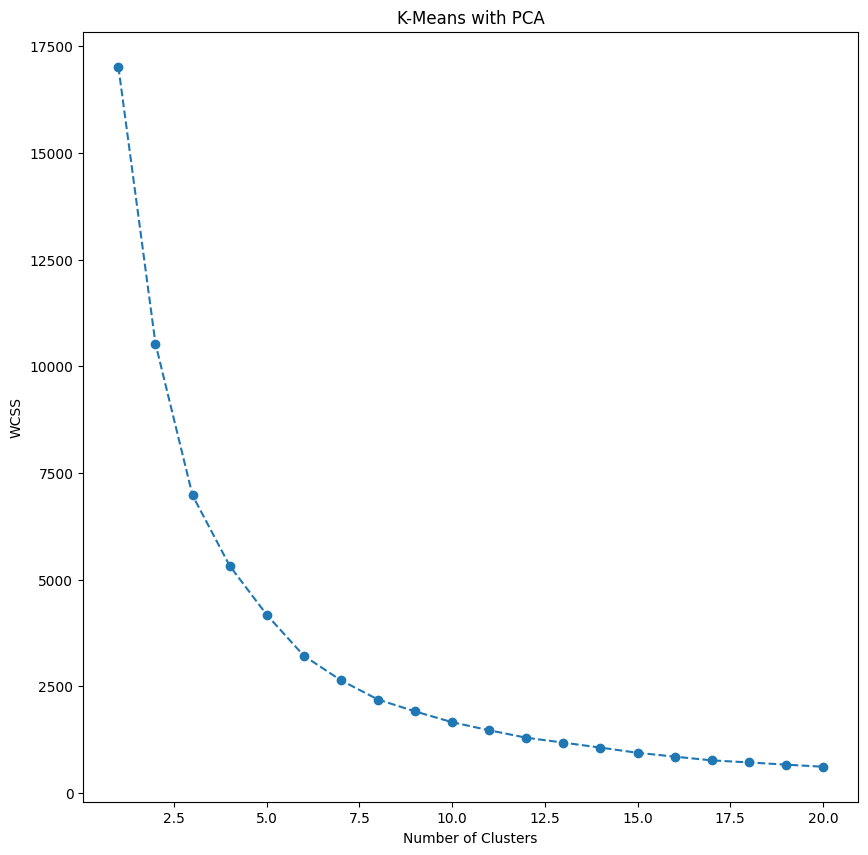

In [56]:
plt.figure(figsize=(10,10))
plt.plot(range(1,21),wcss,marker='o',linestyle='--')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("K-Means with PCA")
plt.show()
#ploting elbow curve

# Ques4(d)

In [57]:
kmeans_pca=KMeans(n_clusters=4,init='k-means++',random_state=42)
kmeans_pca.fit(scores)
#Creating k-Means model using the optimum number of 
#clusters obtained above.

KMeans(n_clusters=4, random_state=42)

In [58]:
label=kmeans_pca.fit_predict(scores)
#predicting labels

In [59]:
df_z=pd.concat([df2.reset_index(drop=True),pd.DataFrame(scores)],axis=1)
#concatinating pca components to dataset

In [60]:
df_z.head()

,CustomerID,Amount,Frequency,Difference,TotalQuantity,NotOfItemsPurchase,Max,Min,Country_Australia,Country_Austria,Country_Bahrain,Country_Belgium,Country_Brazil,Country_Canada,Country_Channel Islands,Country_Cyprus,Country_Czech Republic,Country_Denmark,Country_EIRE,Country_European Community,Country_Finland,Country_France,Country_Germany,Country_Greece,Country_Iceland,Country_Israel,Country_Italy,Country_Japan,Country_Lebanon,Country_Lithuania,Country_Malta,Country_Netherlands,Country_Norway,Country_Poland,Country_Portugal,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified,0,1,2
0,12346.0,77183.60,1,325,74215,1,74215,74215,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,13.470826,7.361167,-5.442902
1,12347.0,4310.00,182,1,2458,182,240,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.659968,-0.809845,-0.096314
2,12348.0,1797.24,31,74,2341,31,144,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.037995,-0.057002,-0.339536
3,12349.0,1757.55,73,18,631,73,36,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.015651,-0.690592,-0.283684
4,12350.0,334.40,17,309,197,17,24,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,-0.804337,1.988489,0.557777


In [61]:
df_z.columns.values[-3:]=['Component1','Component2','Component3']
df_z.head()

,CustomerID,Amount,Frequency,Difference,TotalQuantity,NotOfItemsPurchase,Max,Min,Country_Australia,Country_Austria,Country_Bahrain,Country_Belgium,Country_Brazil,Country_Canada,Country_Channel Islands,Country_Cyprus,Country_Czech Republic,Country_Denmark,Country_EIRE,Country_European Community,Country_Finland,Country_France,Country_Germany,Country_Greece,Country_Iceland,Country_Israel,Country_Italy,Country_Japan,Country_Lebanon,Country_Lithuania,Country_Malta,Country_Netherlands,Country_Norway,Country_Poland,Country_Portugal,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified,Component1,Component2,Component3
0,12346.0,77183.60,1,325,74215,1,74215,74215,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,13.470826,7.361167,-5.442902
1,12347.0,4310.00,182,1,2458,182,240,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.659968,-0.809845,-0.096314
2,12348.0,1797.24,31,74,2341,31,144,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.037995,-0.057002,-0.339536
3,12349.0,1757.55,73,18,631,73,36,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.015651,-0.690592,-0.283684
4,12350.0,334.40,17,309,197,17,24,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,-0.804337,1.988489,0.557777


In [62]:
df_z['labels']=label
df_z.head()
#adding predicted labels to dataset

,CustomerID,Amount,Frequency,Difference,TotalQuantity,NotOfItemsPurchase,Max,Min,Country_Australia,Country_Austria,Country_Bahrain,Country_Belgium,Country_Brazil,Country_Canada,Country_Channel Islands,Country_Cyprus,Country_Czech Republic,Country_Denmark,Country_EIRE,Country_European Community,Country_Finland,Country_France,Country_Germany,Country_Greece,Country_Iceland,Country_Israel,Country_Italy,Country_Japan,Country_Lebanon,Country_Lithuania,Country_Malta,Country_Netherlands,Country_Norway,Country_Poland,Country_Portugal,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified,Component1,Component2,Component3,labels
0,12346.0,77183.60,1,325,74215,1,74215,74215,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,13.470826,7.361167,-5.442902,1
1,12347.0,4310.00,182,1,2458,182,240,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.659968,-0.809845,-0.096314,0
2,12348.0,1797.24,31,74,2341,31,144,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.037995,-0.057002,-0.339536,0
3,12349.0,1757.55,73,18,631,73,36,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.015651,-0.690592,-0.283684,0
4,12350.0,334.40,17,309,197,17,24,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,-0.804337,1.988489,0.557777,2


In [63]:
df_z['labels'].value_counts()
#numbers of datapoints in each cluster

0    3238
2    1083
1      14
3       4
Name: labels, dtype: int64

In [64]:
u_l=np.unique(label)
print(u_l)
#unique labels

[0 1 2 3]


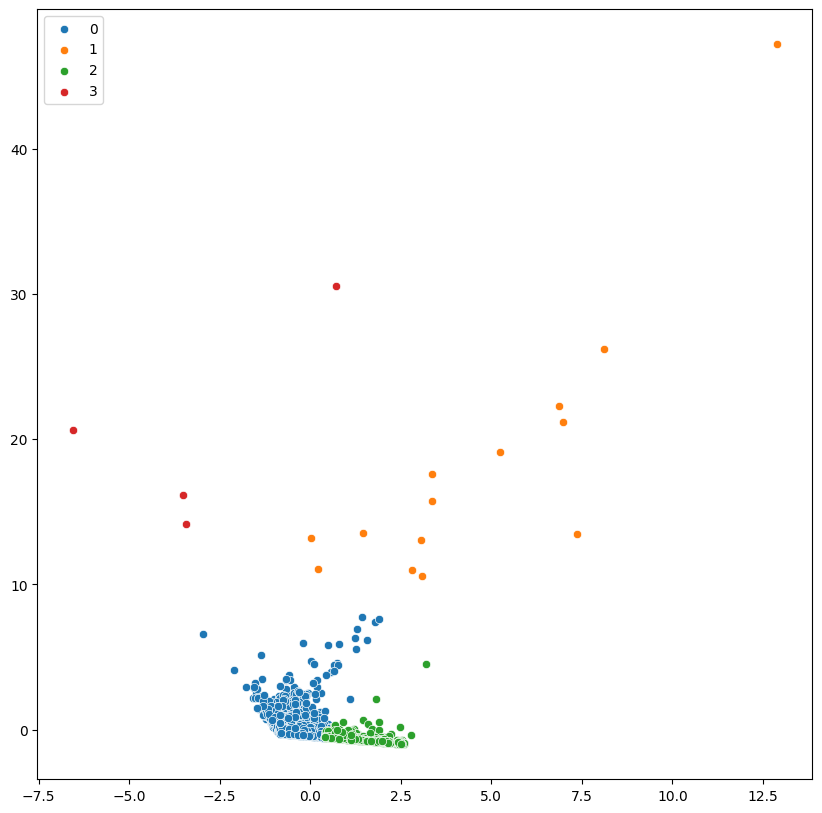

In [66]:
plt.figure(figsize=(10,10))
for i in u_l:
    sns.scatterplot(x=scores[label == i , 1],y=scores[label == i , 0] , label = i)
plt.legend()
plt.show()
#visualising clusters

# Ques4(e)

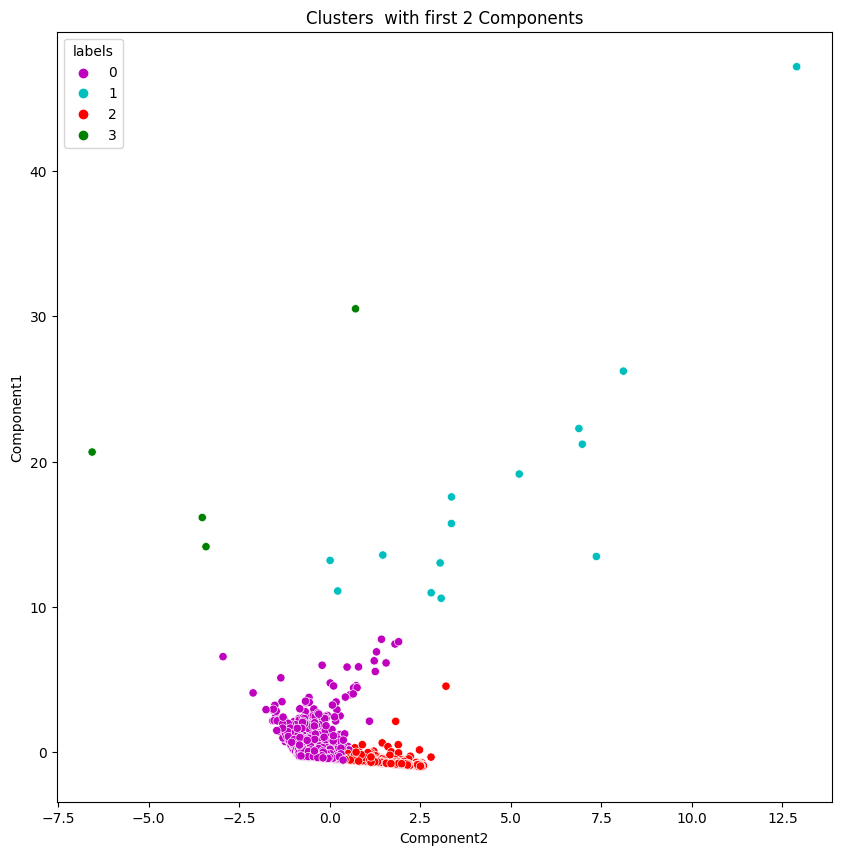

In [68]:
plt.figure(figsize=(10,10))

sns.scatterplot(x=df_z['Component2'],y=df_z['Component1'],hue=df_z['labels'],palette=['m','c','r','g'])
plt.xlabel("Component2")
plt.ylabel("Component1")
plt.title("Clusters  with first 2 Components")
plt.show()
#visualising Clusters using first 2 components